In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pysam
import seaborn as sns
import os

## Helper Functions

In [2]:
def get_read_lengths(bam_file):
    lengths = []
    with pysam.AlignmentFile(bam_file, 'rb') as bam:
        for read in bam:
            lengths.append(read.query_length)
    return lengths

In [3]:
def plot_read_length_distribution(read_lengths):
    # Transform read lengths using the natural logarithm
    read_lengths = np.array(read_lengths)
    log_read_lengths = np.log10(read_lengths+1)

    plt.figure(figsize=(10, 6))
    sns.violinplot(x=log_read_lengths)
    plt.title('Log Read Length Distribution')
    plt.xlabel('Log Read Length')
    plt.grid(True)
    plt.show()

In [4]:
def plot_cpg_distribution(df, column='mod_qual', bins=30):
    """
    Plot a histogram of the CpG probabilities.

    Parameters:
    df (pandas.DataFrame): DataFrame containing the CpG data.
    column (str): Name of the column containing the CpG probabilities.
    bins (int): Number of bins for the histogram.

    Returns:
    None
    """
    # Create a histogram of the CpG probabilities
    plt.hist(df[column], bins=bins, edgecolor='black')

    # Set the title and labels
    plt.title('CpG Probability Distribution')
    plt.xlabel('CpG Probability')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

In [5]:
def filter_unicoverage(df, min_coverage):
    """
    Filter a DataFrame based on minimum coverage.

    Parameters:
    df (pandas.DataFrame): DataFrame containing the CpG data.
    min_coverage (int): Minimum coverage required.

    Returns:
    pandas.DataFrame: Filtered DataFrame.
    """
    # Filter df based on min_coverage first to reduce its size
    df = df[df['position_coverage'] >= min_coverage]

    # Count the number of unique samples per position
    unique_samples_df = df.groupby(['ref_position', 'chrom'])['sample_id_adj'].nunique().reset_index()
    unique_samples_df.columns = ['ref_position', 'chrom', 'unique_samples']

    n_samples_unique = df["sample_id_adj"].nunique()
    unique_samples_df = unique_samples_df[unique_samples_df['unique_samples'] == n_samples_unique]

    # Merge df with unique_samples_df
    df_cvg = pd.merge(df, unique_samples_df, on=['ref_position', 'chrom'], how='inner')

    return df_cvg

In [6]:
def filter_sample_coverage(df, coverage_quantile=0.90):
    # Calculate the coverage quantile
    min_coverage = df['position_coverage'].quantile(coverage_quantile)

    # Print the min_coverage
    print(f"Minimum coverage: {min_coverage}")

    # Filter df based on min_coverage
    df = df[df['position_coverage'] >= min_coverage]

    return df
    

In [7]:
def plot_coverage(df):
    # Calculate and print the maximum coverage
    max_coverage = df['position_coverage'].max()
    print(f"Maximum coverage: {max_coverage}")

    plt.figure(figsize=(10, 6))
    plt.hist(df['position_coverage'], bins=50, color='blue', edgecolor='black', log=True)
    plt.title('Coverage Distribution')
    plt.xlabel('Coverage')
    plt.ylabel('Frequency (log scale)')
    plt.show()

## BAM Exploration

In [8]:
# Replace 'your_bam_file.bam' with the path to your BAM file
bam_file = '/data/lvisser/modkit/outputs/bam/data_OHMX20230016R_20231114/no_haplotag/IMR14nov_R1.filtered.sorted.bam'

# Get read lengths from BAM file
read_lengths = get_read_lengths(bam_file)

print(len(read_lengths))

10892012


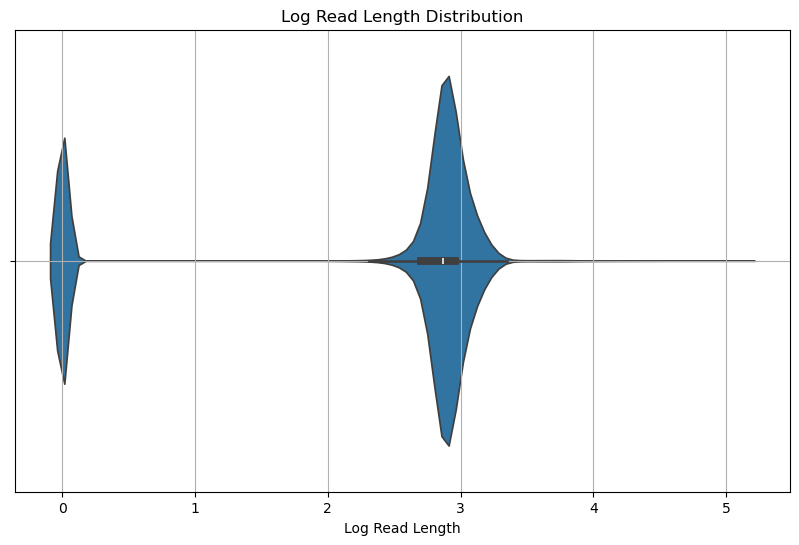

In [9]:
# Plot read length distribution
plot_read_length_distribution(read_lengths)

## Processing and Filtering

In [10]:
# python /data/lvisser/feature_matrices/processed_tables/process_files.py

In [11]:
# python /data/lvisser/feature_matrices/concatenated_tables/concat_files.py

In [12]:
coverage_all = pd.read_csv('/data/lvisser/coverage/all_samples.depth.txt', sep = "\t")
min_coverage = 5

FileNotFoundError: [Errno 2] No such file or directory: '/data/lvisser/coverage/all_samples.depth.txt'

## Neuroblastoma

### Unblocked + Blocked

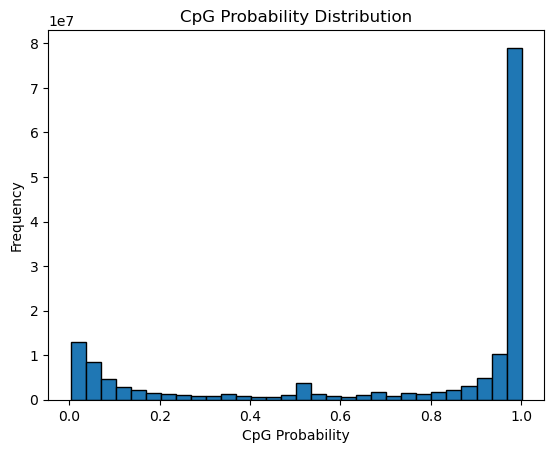

Maximum coverage: 7393


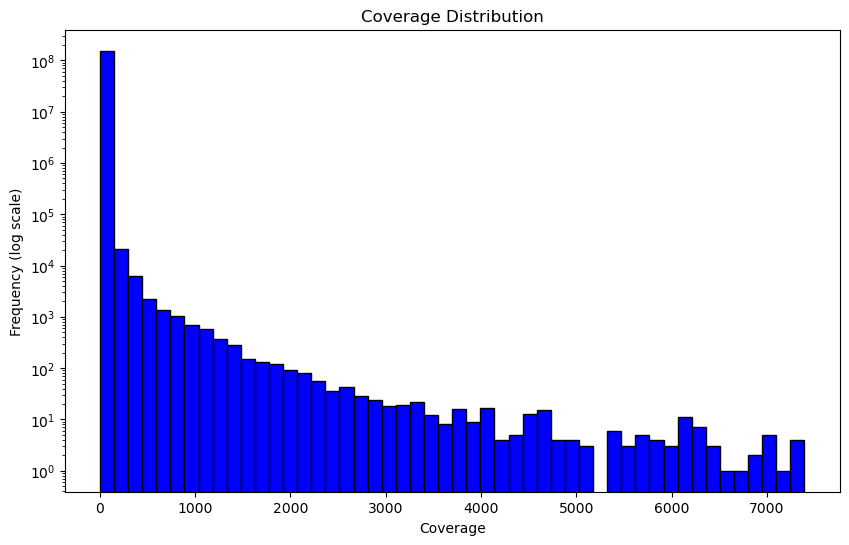

In [53]:
file_path = "/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_20231114/cpg_cat_nb1.csv"
cpg_cat_nb1 = pd.read_csv(file_path)
plot_cpg_distribution(cpg_cat_nb1)
plot_coverage(cpg_cat_nb1)

Minimum coverage: 4.0


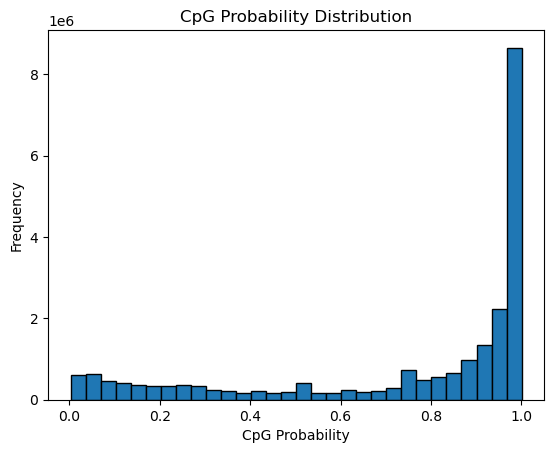

Maximum coverage: 7393


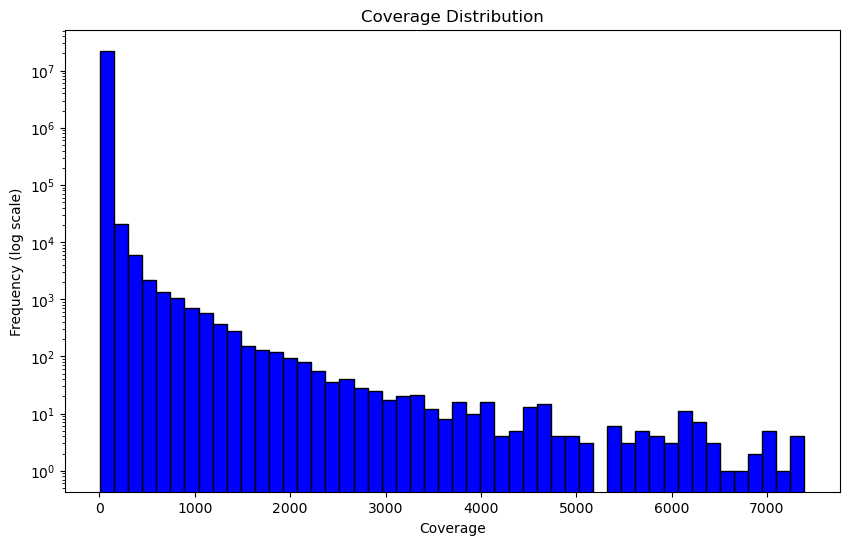

In [54]:
cpg_cat_nb1_scvg = filter_sample_coverage(cpg_cat_nb1, min_scoverage_quantile)
cpg_cat_nb1_scvg.to_csv("/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_20231114/cpg_cat_nb1_scvg.csv", index = False)
plot_cpg_distribution(cpg_cat_nb1_scvg)
plot_coverage(cpg_cat_nb1_scvg)

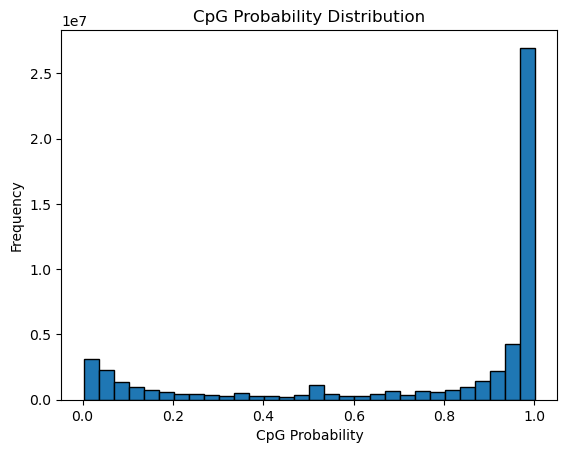

Maximum coverage: 7393


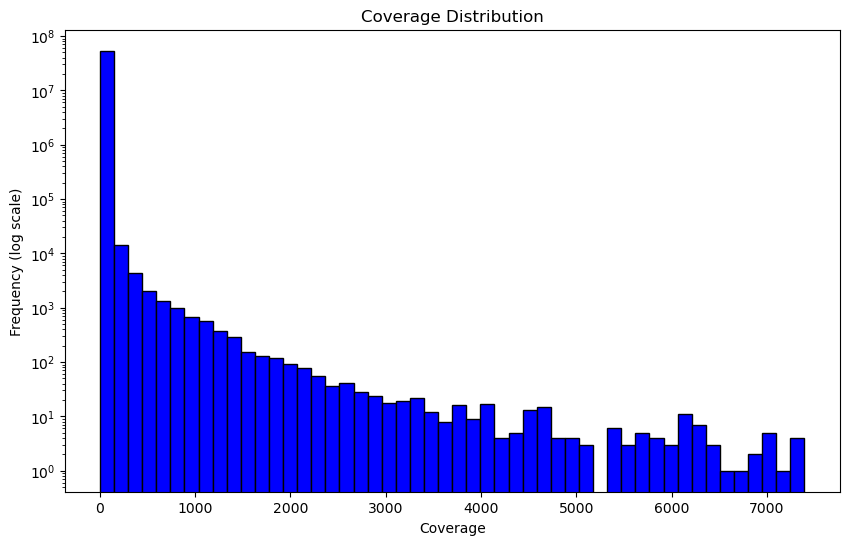

In [57]:
cpg_cat_nb1_unicvg = filter_unicoverage(cpg_cat_nb1, min_unicoverage)
cpg_cat_nb1_unicvg.to_csv("/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_20231114/cpg_cat_nb1_unicvg.csv", index = False)
plot_cpg_distribution(cpg_cat_nb1_unicvg)
plot_coverage(cpg_cat_nb1_unicvg)

### Unblocked

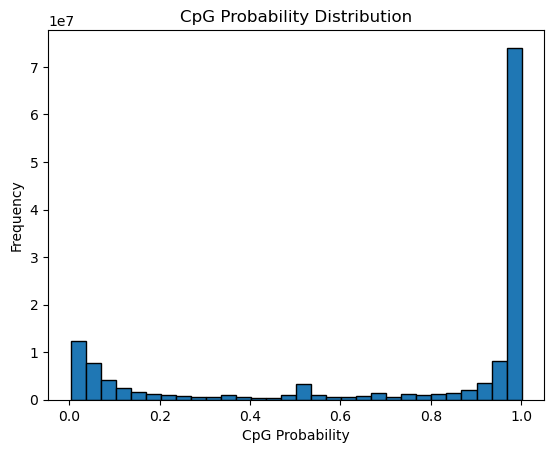

Maximum coverage: 7224


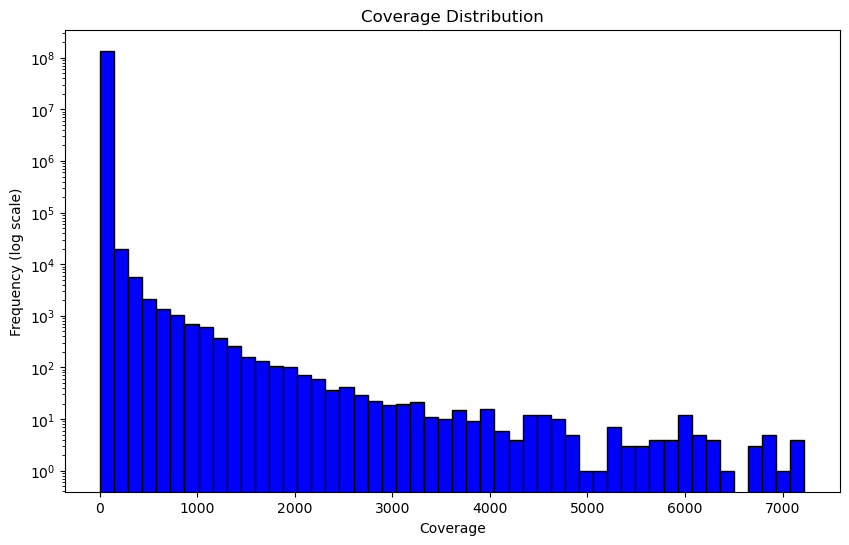

In [58]:
file_path = "/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_20231114/cpg_cat_nb1_unblocked.csv"
cpg_cat_nb1_unblocked = pd.read_csv(file_path)
plot_cpg_distribution(cpg_cat_nb1_unblocked)
plot_coverage(cpg_cat_nb1_unblocked)

Minimum coverage: 3.0


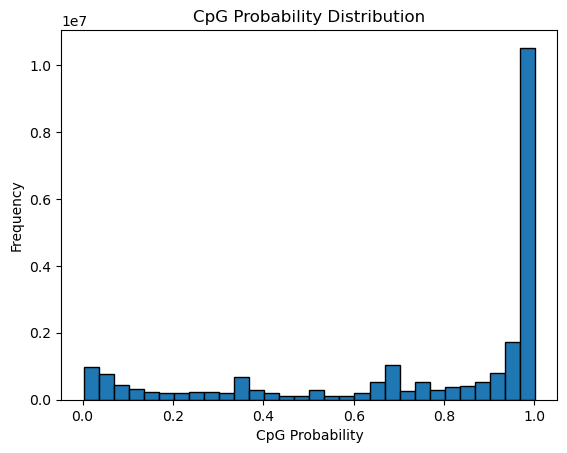

Maximum coverage: 7224


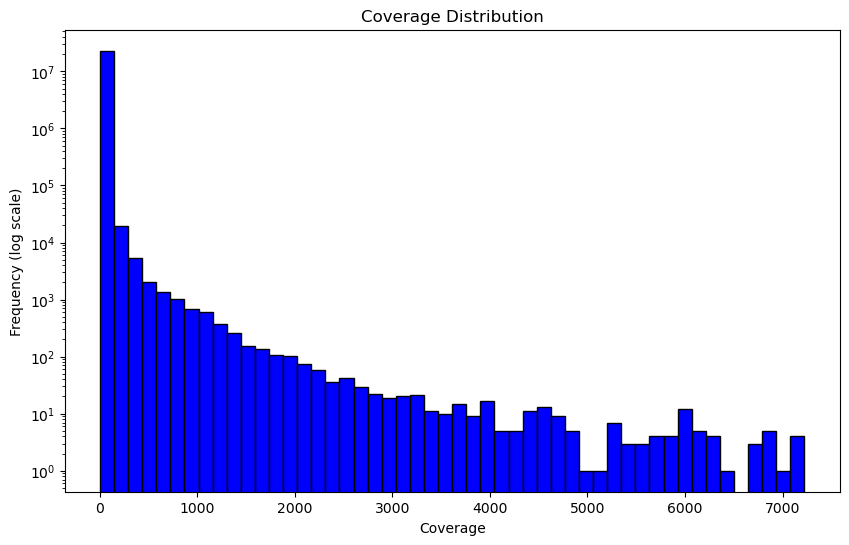

In [59]:
cpg_cat_nb1_unblocked_scvg = filter_sample_coverage(cpg_cat_nb1_unblocked, min_scoverage_quantile)
cpg_cat_nb1_unblocked_scvg.to_csv("/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_20231114/cpg_cat_nb1_unblocked_scvg.csv", index = False)
plot_cpg_distribution(cpg_cat_nb1_unblocked_scvg)
plot_coverage(cpg_cat_nb1_unblocked_scvg)

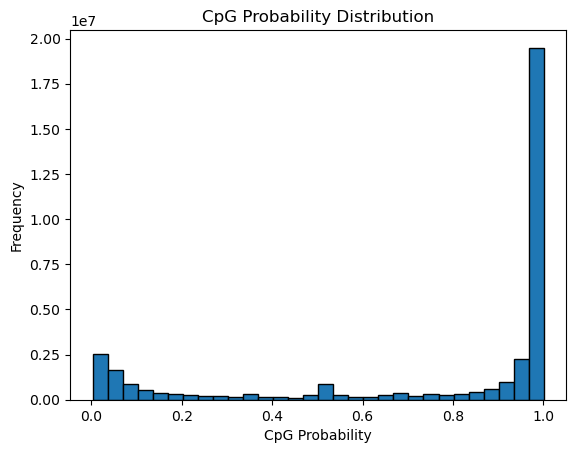

Maximum coverage: 7224


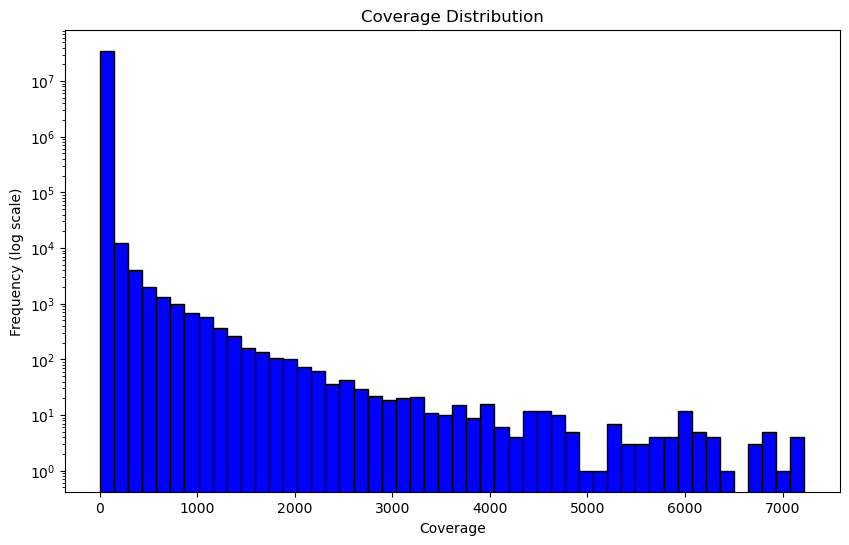

In [60]:
cpg_cat_nb1_unblocked_unicvg = filter_unicoverage(cpg_cat_nb1_unblocked, min_unicoverage)
cpg_cat_nb1_unblocked_unicvg.to_csv("/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_20231114/cpg_cat_nb1_unblocked_unicvg.csv", index = False)
plot_cpg_distribution(cpg_cat_nb1_unblocked_unicvg)
plot_coverage(cpg_cat_nb1_unblocked_unicvg)

## Multiple Myeloma

### Blocked + Unblocked

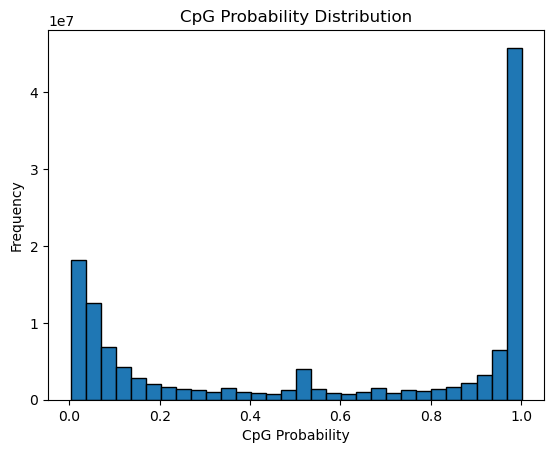

Maximum coverage: 10686


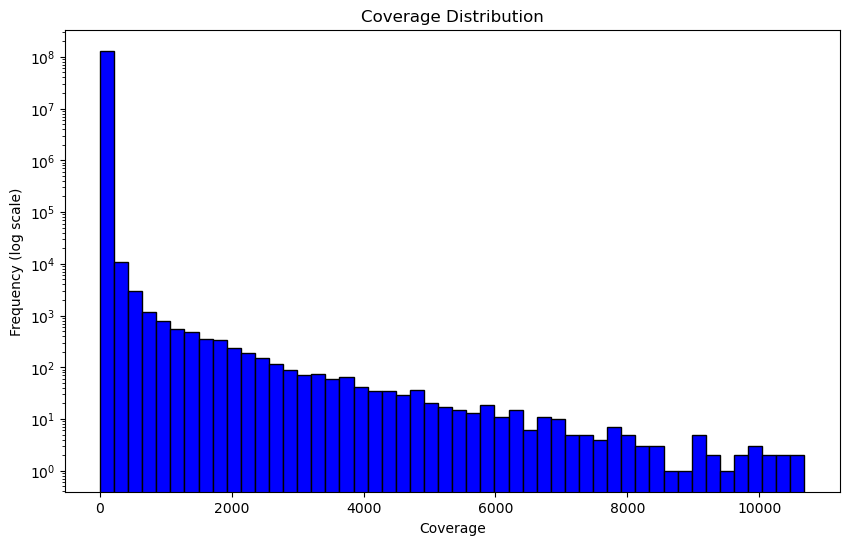

In [61]:
file_path = "/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_MM_2/cpg_cat_mm1.csv"
cpg_cat_mm1 = pd.read_csv(file_path)
plot_cpg_distribution(cpg_cat_mm1)
plot_coverage(cpg_cat_mm1)

Minimum coverage: 5.0


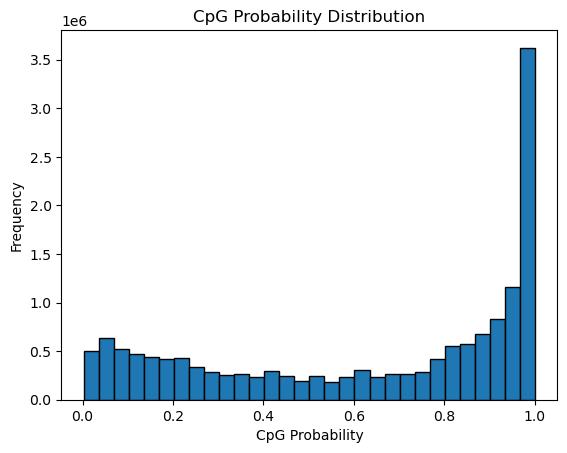

Maximum coverage: 10686


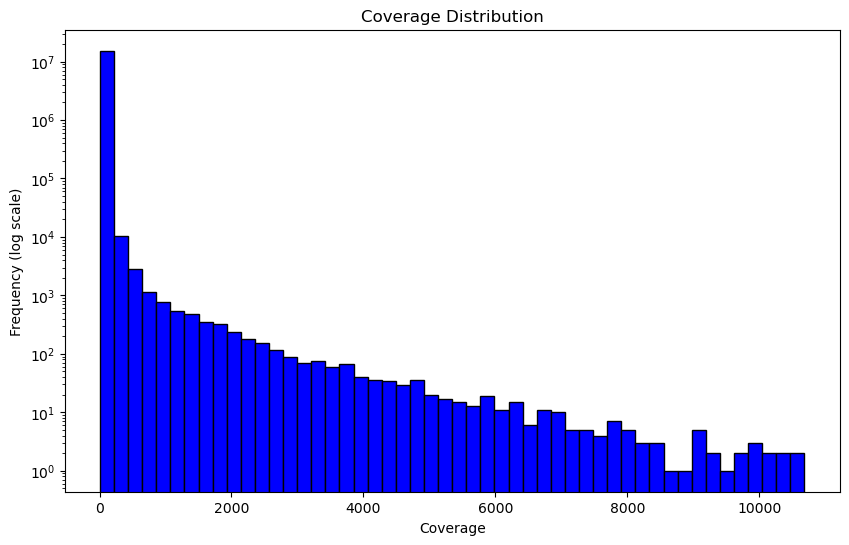

In [62]:
cpg_cat_mm1_scvg = filter_sample_coverage(cpg_cat_mm1, min_scoverage_quantile)
cpg_cat_mm1_scvg.to_csv("/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_MM_2/cpg_cat_mm1_scvg.csv", index = False)
plot_cpg_distribution(cpg_cat_mm1_scvg)
plot_coverage(cpg_cat_mm1_scvg)

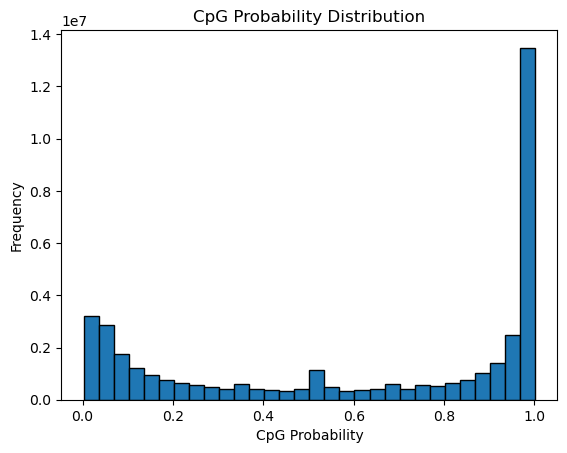

Maximum coverage: 10686


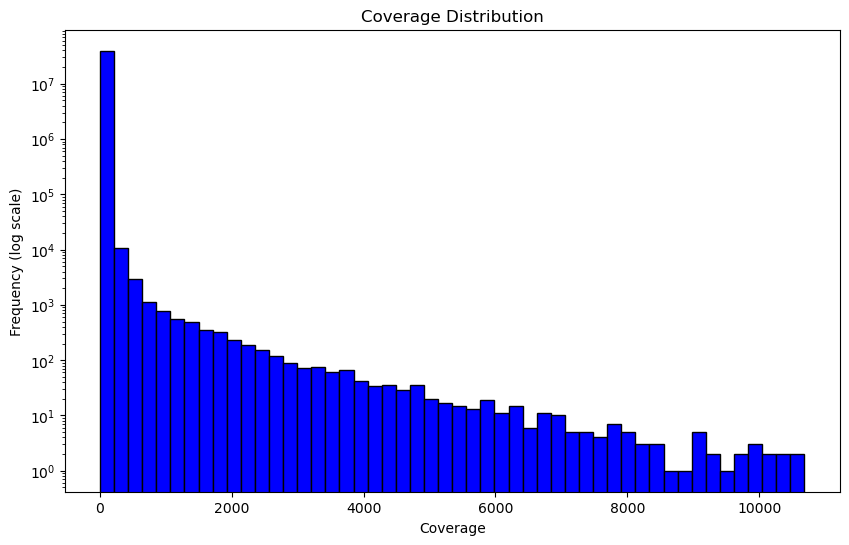

In [63]:
cpg_cat_mm1_unicvg = filter_unicoverage(cpg_cat_mm1, min_unicoverage)
cpg_cat_mm1_unicvg.to_csv("/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_MM_2/cpg_cat_mm1_unicvg.csv", index = False)
plot_cpg_distribution(cpg_cat_mm1_unicvg)
plot_coverage(cpg_cat_mm1_unicvg)

### Unblocked

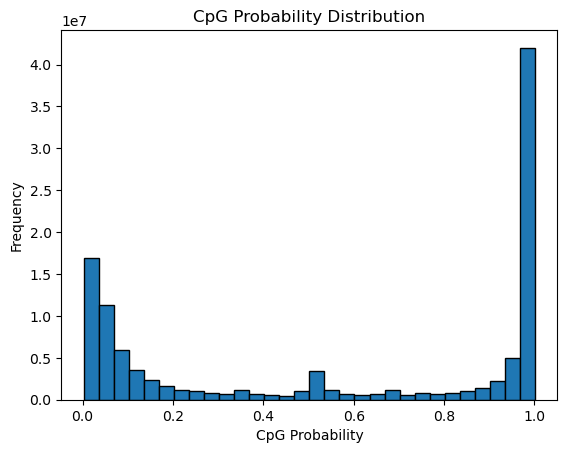

Maximum coverage: 10587


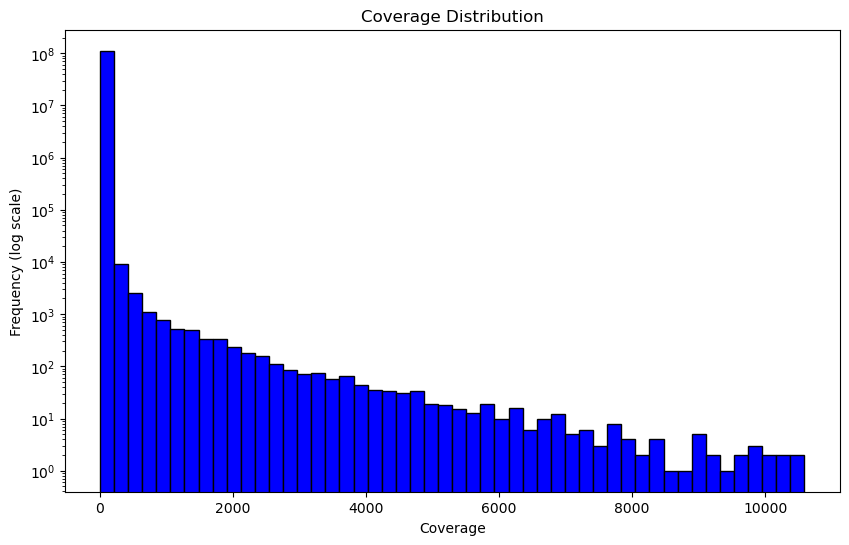

In [64]:
file_path = "/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_MM_2/cpg_cat_mm1_unblocked.csv"
cpg_cat_mm1_unblocked = pd.read_csv(file_path)
plot_cpg_distribution(cpg_cat_mm1_unblocked)
plot_coverage(cpg_cat_mm1_unblocked)

Minimum coverage: 3.0


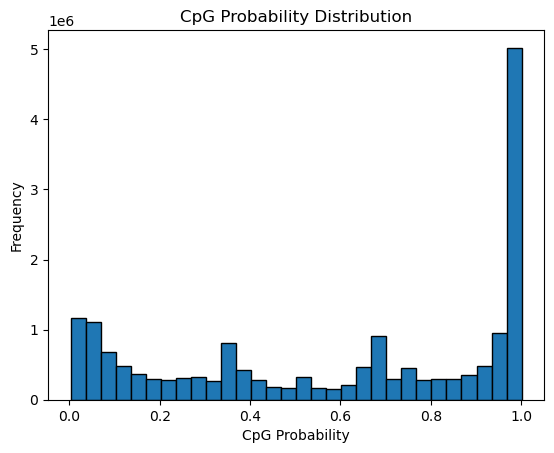

Maximum coverage: 10587


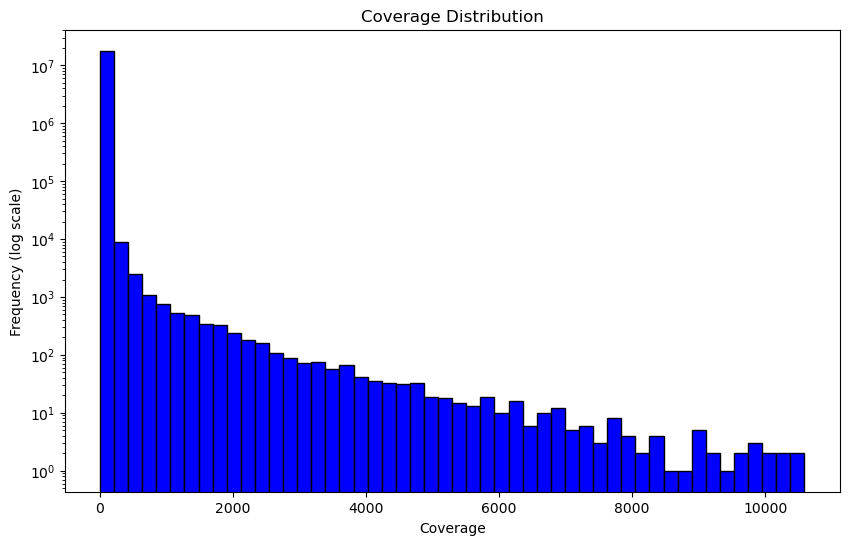

In [65]:
cpg_cat_mm1_unblocked_scvg = filter_sample_coverage(cpg_cat_mm1_unblocked, min_scoverage_quantile)
cpg_cat_mm1_unblocked_scvg.to_csv("/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_MM_2/cpg_cat_mm1_unblocked_scvg.csv", index = False)
plot_cpg_distribution(cpg_cat_mm1_unblocked_scvg)
plot_coverage(cpg_cat_mm1_unblocked_scvg)

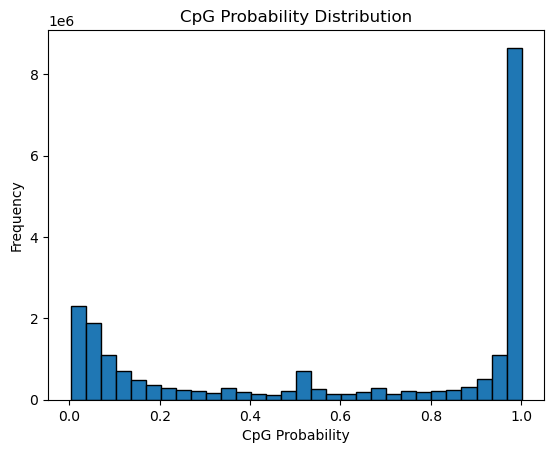

Maximum coverage: 10587


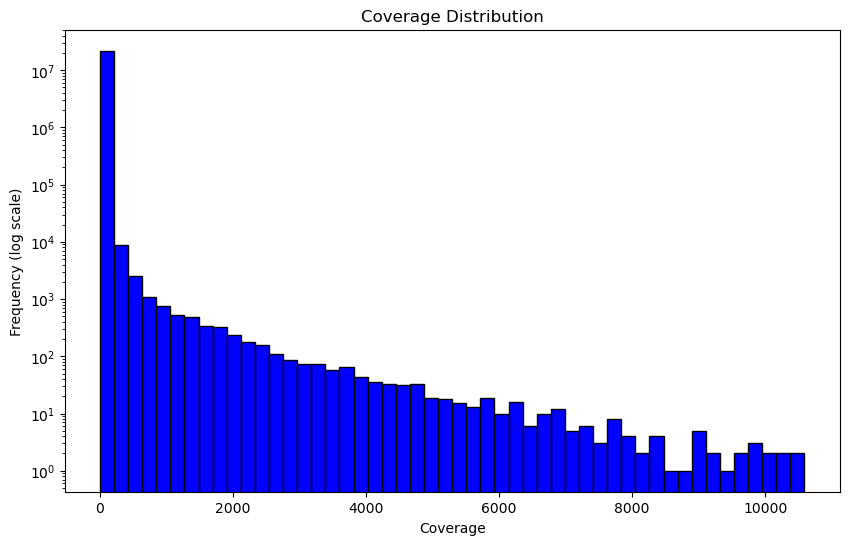

In [66]:
cpg_cat_mm1_unblocked_unicvg = filter_unicoverage(cpg_cat_mm1_unblocked, min_unicoverage)
cpg_cat_mm1_unblocked_unicvg.to_csv("/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_MM_2/cpg_cat_mm1_unblocked_unicvg.csv", index = False)
plot_cpg_distribution(cpg_cat_mm1_unblocked_unicvg)
plot_coverage(cpg_cat_mm1_unblocked_unicvg)